In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv', index_col=0)

In [3]:
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
#there is no missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 2 to 1
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 27.5 KB


In [ ]:
#All values are intiger datatype so no need of encoding

In [6]:
import seaborn as sns

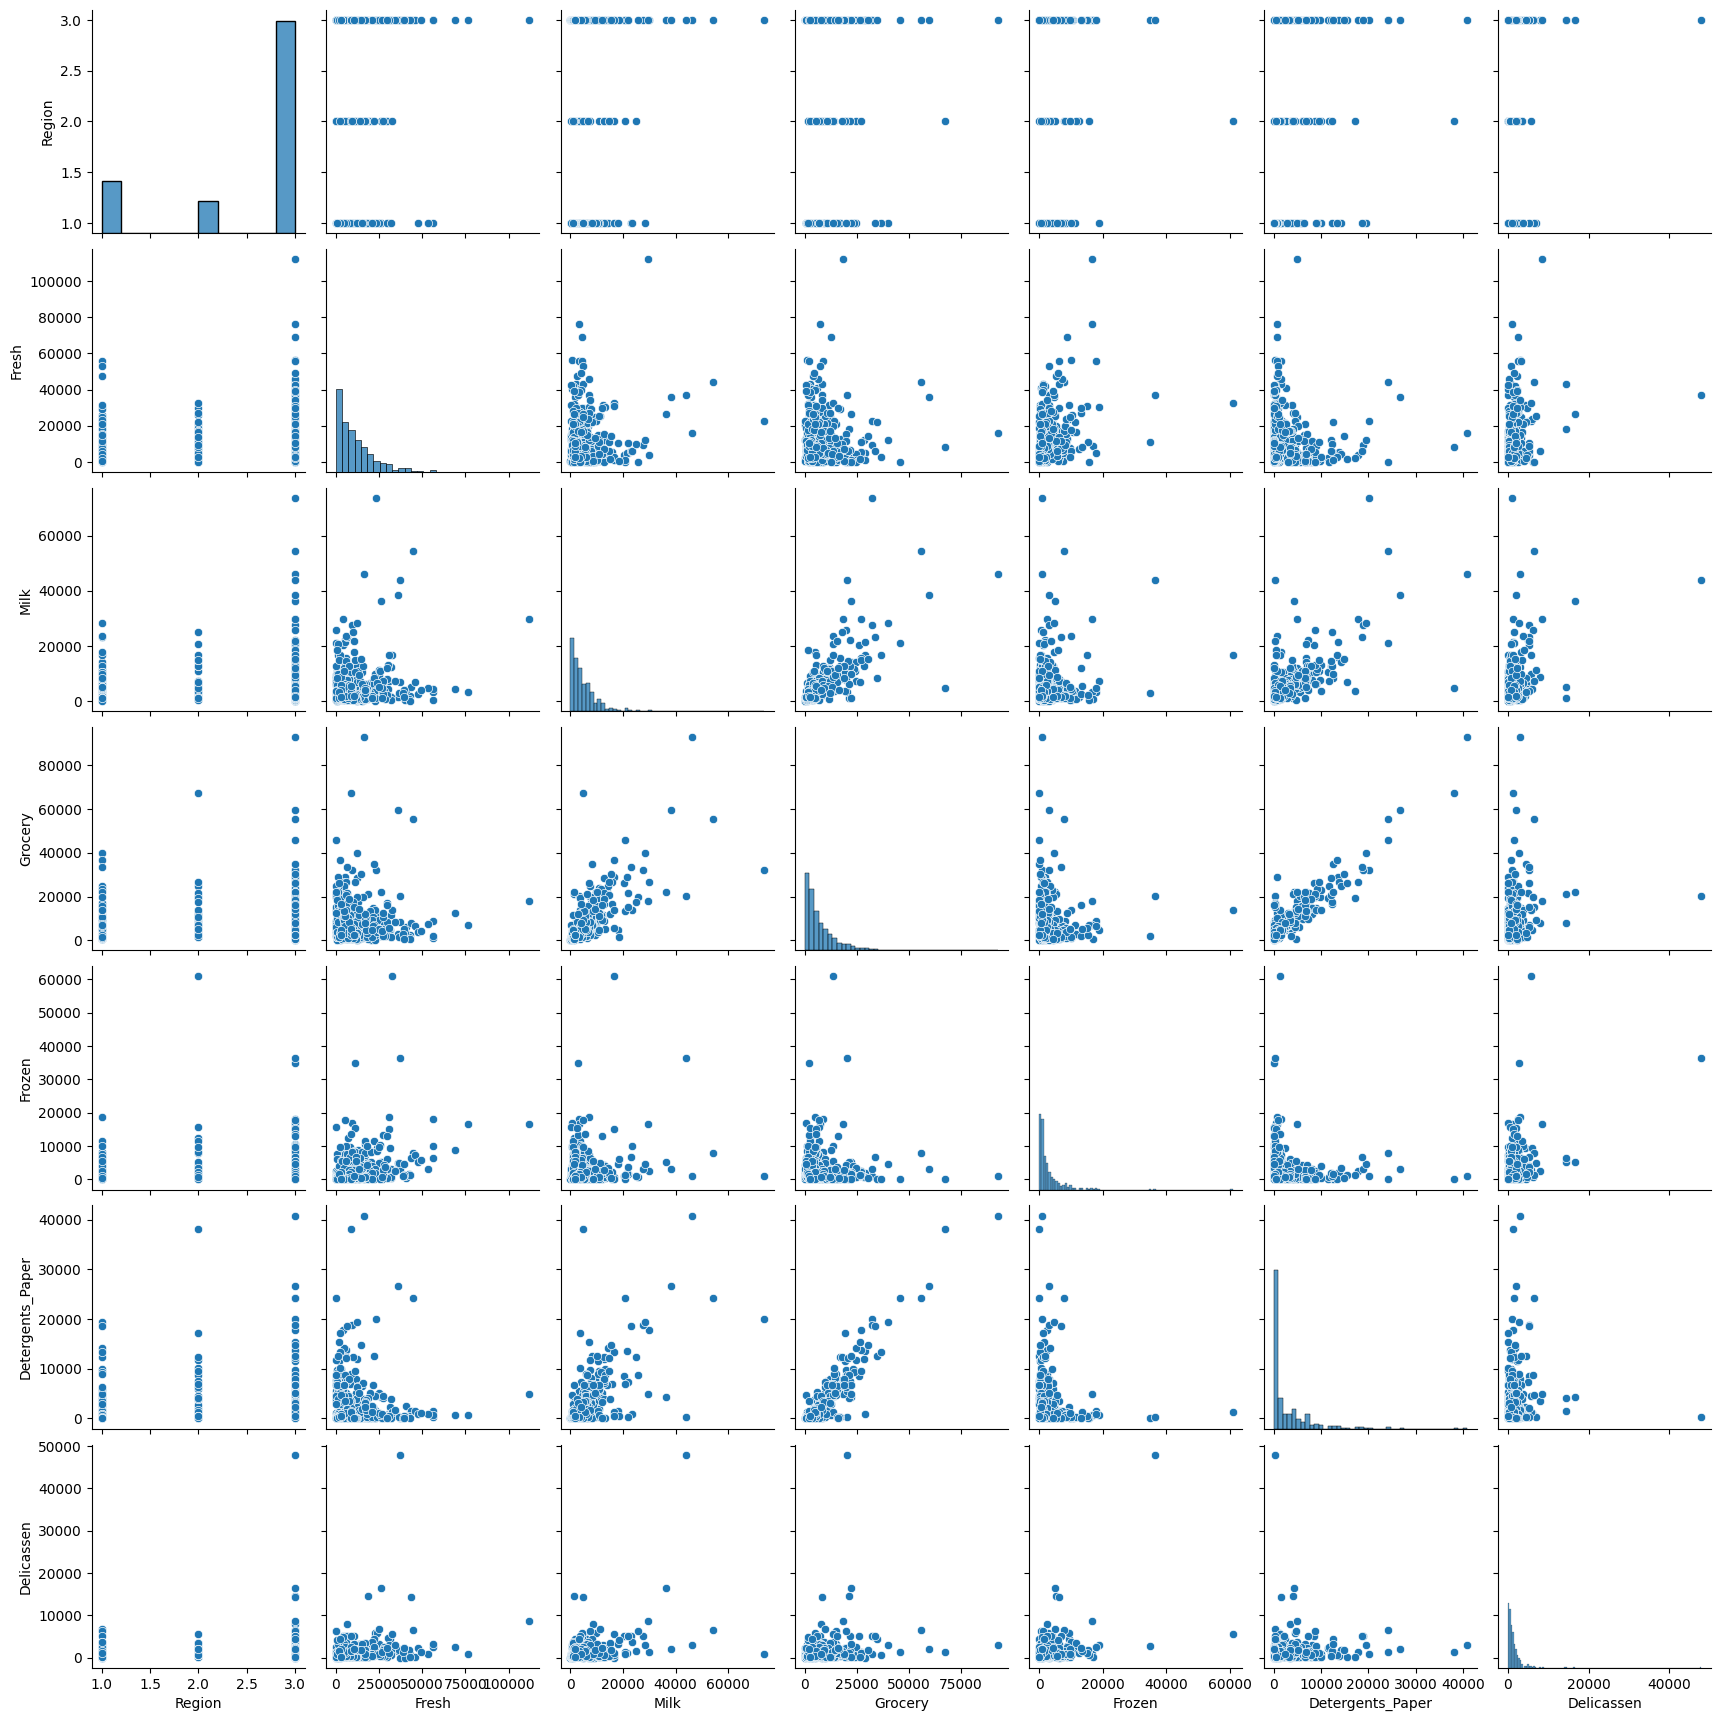

In [7]:
sns.pairplot(data)

In [8]:
data.columns

Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [9]:
x = data[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [ ]:
#Clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

In [12]:
wcss

[157595857428.78854,
 113217528783.50446,
 80338595898.58244,
 65899238276.94791,
 53116919662.49207,
 46759761316.772385,
 41587439703.50829,
 36137321841.39235,
 32817703385.852757,
 29902903068.414223]

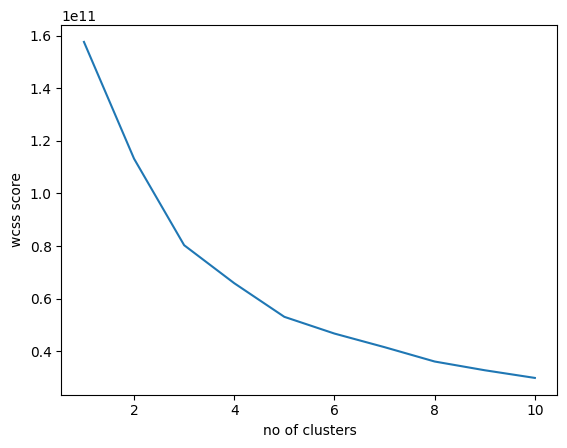

In [13]:
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss score')
plt.show()

In [ ]:
# Elbow staring from the point 5 so n=5
#for refinement taking 20 iteration

In [14]:
km = KMeans(n_clusters=5,n_init=20)
km.fit(x)

KMeans(n_clusters=5, n_init=20)

In [15]:
cluster_labels= km.predict(x)

In [16]:
cluster_labels

array([0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 0, 3, 3, 3, 0, 1, 0, 3, 0, 3, 0,
       3, 1, 3, 3, 0, 3, 1, 2, 3, 0, 3, 3, 0, 0, 3, 1, 1, 2, 3, 3, 1, 1,
       0, 1, 1, 4, 0, 1, 0, 0, 2, 1, 3, 0, 1, 1, 3, 0, 0, 4, 0, 1, 0, 4,
       0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 0, 4, 4, 2,
       0, 3, 0, 3, 1, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 3, 3, 0, 1, 0, 1,
       0, 1, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 2, 3, 3, 0, 2, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 0, 3, 1, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 1, 1, 3, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 3, 3, 0,
       0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 0, 1, 3, 4, 0, 0, 0, 1, 1, 3, 1, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 2, 3, 3,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 1, 0, 3, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0,
       1, 1, 1, 3, 1, 3, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 3, 2, 2,
       0, 3, 3, 2, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 3,

In [ ]:
#Scatter Plot

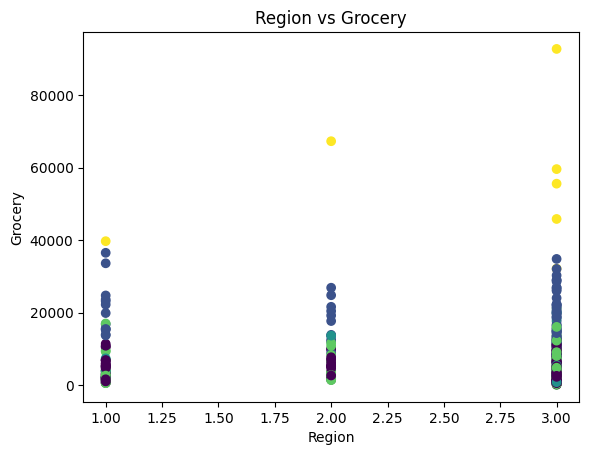

In [17]:
plt.scatter(x['Region'],x['Grocery'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.show()

In [ ]:
#Taking Fresh vs Frozen for better plot

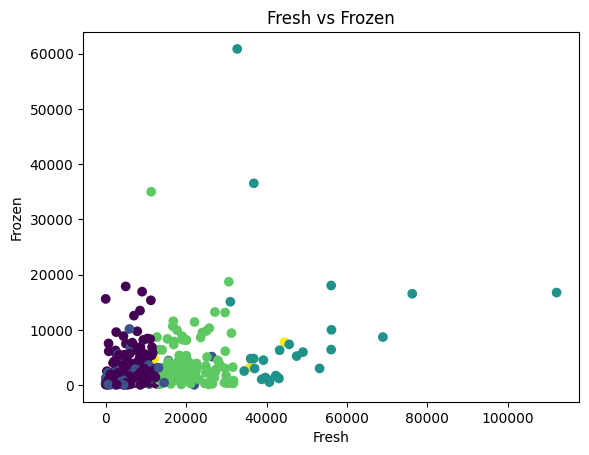

In [19]:
plt.scatter(x['Fresh'],x['Frozen'],c=cluster_labels)
plt.title('Fresh vs Frozen')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

In [ ]:
#Scaling and DBScan

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling Using Standard Scaler

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [23]:
dbscan.fit(x_scaled)

DBSCAN()

In [24]:
cluster_labels = dbscan.labels_

In [25]:
fresh = x_scaled[:, 0]
frozen = x_scaled[:, 5]

In [ ]:
#DBScan Scatter Plot

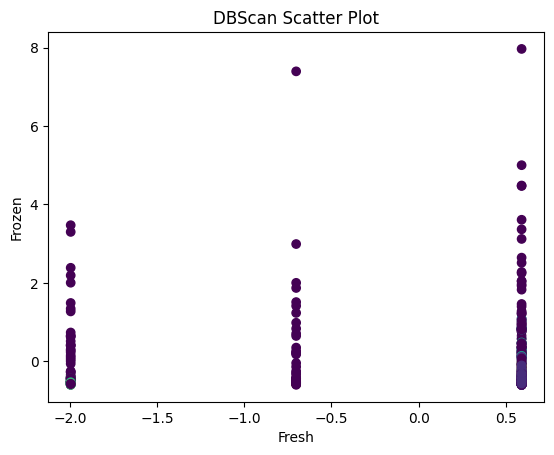

In [26]:
plt.scatter(fresh, frozen, c=cluster_labels)
plt.title('DBScan Scatter Plot')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

In [27]:
data.corr()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [28]:
data.mean()

Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [29]:
data.var()

Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
dtype: float64

In [32]:
from sklearn.preprocessing import scale

In [33]:
scale(data)

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [ ]:
#Converting into DataFrame

In [35]:
x = pd.DataFrame(scale(data),index = data.index,columns = data.columns)

In [36]:
x.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
2,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
2,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
1,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
2,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
#PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pc = PCA()

In [40]:
pc_array = pc.fit_transform(x)

In [41]:
pc_array.shape

(440, 7)

In [ ]:
#Reduce Component into 3

In [42]:
pc = PCA(n_components=3)

In [43]:
pc_array = pc.fit_transform(x)

In [44]:
pc_array.shape

(440, 3)

In [45]:
pc_data = pd.DataFrame(pc_array,columns = ["pc1","pc2","pc3"])

In [46]:
pc_data.head()

,pc1,pc2,pc3
0,0.205470,-0.268756,-0.675597
1,0.446228,-0.294124,-0.591560
2,0.824133,0.847760,-0.538481
3,-0.766022,0.686296,-0.495091
4,0.179955,1.305515,-0.598799


In [ ]:
#Correlation Matrix

In [47]:
pc_data.corr().round(1)

,pc1,pc2,pc3
pc1,1.0,0.0,-0.0
pc2,0.0,1.0,-0.0
pc3,-0.0,-0.0,1.0


In [48]:
#explained variance ratio of pca
pc.explained_variance_ratio_

array([0.37795265, 0.24356898, 0.14375576])

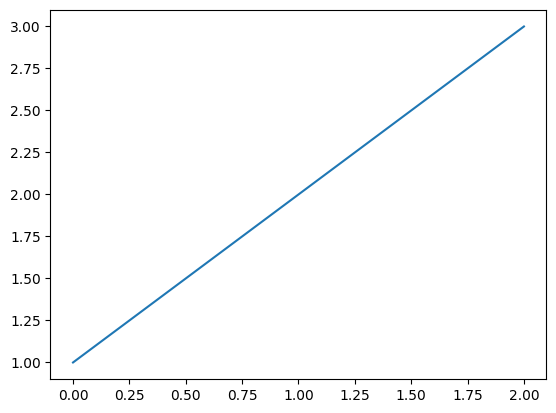

In [49]:
#plot the explained variance ratio of pca
plt.plot([1,2,3]),pc.explained_variance_ratio_
plt.show()

In [ ]:
#